In [3]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
from material import open_material as om
from scipy.optimize import differential_evolution, minimize
import matplotlib.pyplot as plt

In [4]:
scan = pd.read_csv('./spectrum/LENS/T_0.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

air = ml.Non_Dispersion(1)
OC = om('OC_LENS', 'Material')
SiO2 = om('SiO2_LENS', 'Sellmeier') 
SiN = om('SiN_LENS', 'Sellmeier')
ITO = om('ITO_LENS', 'Sellmeier')
sodalime = om('sodalime', 'Material')

In [5]:
hypoU = lambda th:tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
)

hypoD = lambda th:tm.Design(
    [sodalime, SiN, SiO2, ITO, SiN, SiO2, air],
    [None, th[5], th[4], th[3], th[2], th[1], th[0], None]
)

Bare_glass = tm.Design(
    [sodalime, air],
    [None, None]
)

RB, TB  = Bare_glass.reflec_trans(wl)
hypo_T = lambda th:(hypoU(th).transmittance(wl)*TB)/(1-hypoD(th).reflectance(wl)*RB)
fom = lambda th:sum(abs(hypo_T(th)-scan/100+th[6]))

In [40]:
sol = differential_evolution(fom, [(1600, 2000), (6,14), (36, 60), (18,30),(36, 60),(8,14),(-0.5,0.5)])
print(sol.x)

[1.67896107e+03 6.00037141e+00 3.60291536e+01 1.95624412e+01
 5.30905910e+01 9.62890708e+00 1.14389463e-02]


In [29]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

[ 1.73598936e+03  7.18300048e+00  7.07880569e+01  7.44425132e+00
 -3.95353713e+01  3.21087271e+00  3.76884082e-02]


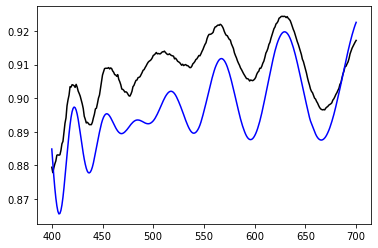

In [15]:
gus = [1707.575, 12.,27.1, 20.,37.05982538, 12. ]
plt.plot(wl, scan/100, '-k',)
plt.plot(wl, hypo_T(gus), '-b')
#plt.savefig('LENS.png')
plt.show()